Cotton Diseases Prediction Detection Using Deep Learning

In [1]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.5
config.gpu_options.allow_growth=True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3,ResNet152V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE=[224,224]

train_path='./drive/My Drive/data/train'
valid_path='./drive/My Drive/data/val'


In [ ]:
resnet=ResNet152V2(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)


In [ ]:
for layers in resnet.layers:
  layers.trainable=False


In [ ]:
folders=glob('./drive/My Drive/data/train/*')

In [ ]:
x=Flatten()(resnet.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=resnet.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('./drive/My Drive/data/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('./drive/My Drive/data/val',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 324 images belonging to 4 classes.


In [ ]:
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=20,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 40s 659ms/step - loss: 1.7537 - accuracy: 0.8068 - val_loss: 0.8085 - val_accuracy: 0.9136
Epoch 2/20
61/61 [==============================] - 38s 626ms/step - loss: 0.4982 - accuracy: 0.9282 - val_loss: 0.5411 - val_accuracy: 0.9228
Epoch 3/20
61/61 [==============================] - 38s 629ms/step - loss: 0.3959 - accuracy: 0.9421 - val_loss: 0.3758 - val_accuracy: 0.9198
Epoch 4/20
61/61 [==============================] - 38s 629ms/step - loss: 0.4433 - accuracy: 0.9426 - val_loss: 0.5610 - val_accuracy: 0.9228
Epoch 5/20
61/61 [==============================] - 38s 625ms/step - loss: 0.3377 - accuracy: 0.9585 - val_loss: 0.4481 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 38s 624ms/step - loss: 0.2324 - accuracy: 0.9636 - val_loss: 0.8655 - val_accuracy: 0.9228
Epoch 7/20
61/61 [==============================] - 38s 625ms/step - loss: 0.3091 - accuracy: 0.9590 - val_loss: 0.4679 - val_accuracy: 0.9414

In [ ]:
model.save('resnet.h5')

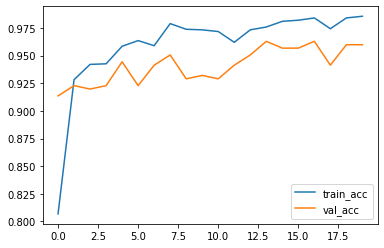

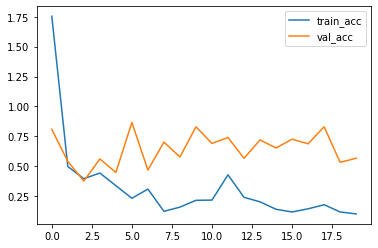

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('resnet_model_acc')


plt.plot(r.history['loss'],label='train_acc')
plt.plot(r.history['val_loss'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('resnet_model_loss')

In [ ]:
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
for layers in inception.layers:
  layers.trainable=False
  
x=Flatten()(inception.output)
prediction=Dense(len(folders),activation='softmax')(x)
  
model2=Model(inputs=inception.input,outputs=prediction)

model2.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
______________________________________________________________________________________

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model2.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=20,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 35s 581ms/step - loss: 2.2117 - accuracy: 0.7391 - val_loss: 0.5337 - val_accuracy: 0.8827
Epoch 2/20
61/61 [==============================] - 34s 565ms/step - loss: 0.6030 - accuracy: 0.8980 - val_loss: 0.6388 - val_accuracy: 0.8673
Epoch 3/20
61/61 [==============================] - 35s 569ms/step - loss: 0.6117 - accuracy: 0.8919 - val_loss: 1.2099 - val_accuracy: 0.8426
Epoch 4/20
61/61 [==============================] - 35s 570ms/step - loss: 0.4771 - accuracy: 0.9185 - val_loss: 0.2581 - val_accuracy: 0.9383
Epoch 5/20
61/61 [==============================] - 35s 568ms/step - loss: 0.4231 - accuracy: 0.9262 - val_loss: 0.5925 - val_accuracy: 0.8920
Epoch 6/20
61/61 [==============================] - 35s 575ms/step - loss: 0.5044 - accuracy: 0.9282 - val_loss: 0.8042 - val_accuracy: 0.8981
Epoch 7/20
61/61 [==============================] - 35s 569ms/step - loss: 0.5953 - accuracy: 0.9257 - val_loss: 0.3331 - val_accuracy: 0.9352

In [ ]:
model2.save('inception.h5')

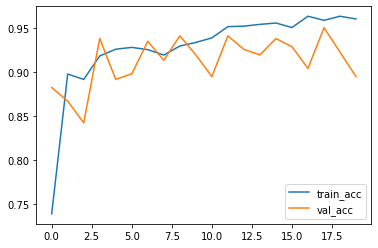

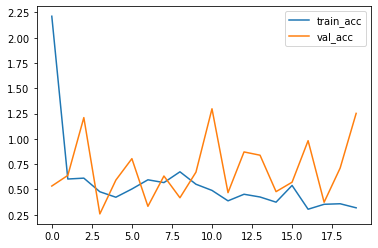

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('inception_model_acc')


plt.plot(r.history['loss'],label='train_acc')
plt.plot(r.history['val_loss'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('inception_model_loss')

In [4]:
import tensorflow
model_load = tensorflow.keras.models.load_model('./drive/My Drive/inception.h5')

In [7]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

image=load_img('./drive/My Drive/data/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224, 224))
x = img_to_array(image)
x = x/255
x = np.expand_dims(x ,axis=0)
preds = model_load.predict(x)
preds=np.argmax(preds, axis=1)
if preds==0:
    preds="The leaf is diseased cotton leaf"
elif preds==1:
    preds="The leaf is diseased cotton plant"
elif preds==2:
    preds="The leaf is fresh cotton leaf"
else:
    preds="The leaf is fresh cotton plant"
        


In [8]:
print(preds)

The leaf is diseased cotton leaf
